In [72]:
import pandas as pd
import numpy as np


df = pd.read_csv('ncr_ride_bookings.csv')
df

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI


firstly go make little analyse 

In [73]:
### payment_type and amount by payment_type
payment_type = df.groupby('Payment Method')['Booking Value'].sum().reset_index()
payment_type = payment_type.sort_values(by='Booking Value', ascending=False)
payment_type

,Payment Method,Booking Value
3,UPI,23345101.0
0,Cash,12895649.0
4,Uber Wallet,6200898.0
1,Credit Card,5224025.0
2,Debit Card,4180510.0


In [74]:
### count of bookings successful and failed
typesofbookings = df['Booking Status'].value_counts().reset_index()
typesofbookings.columns = ['Booking Status', 'count']
typesofbookings

,Booking Status,count
0,Completed,93000
1,Cancelled by Driver,27000
2,No Driver Found,10500
3,Cancelled by Customer,10500
4,Incomplete,9000


In [75]:
### avg cost for ride by type of car

avgcostbycar = df.groupby('Vehicle Type')['Booking Value'].mean().reset_index()
avgcostbycar = avgcostbycar.sort_values(by='Booking Value', ascending=False)
avgcostbycar

,Vehicle Type,Booking Value
3,Go Sedan,511.503385
1,Bike,510.200299
4,Premier Sedan,509.568169
2,Go Mini,507.684934
0,Auto,506.725241
6,eBike,503.897090
5,Uber XL,501.816749


In [76]:
### top 10 pickup locations by number of rides
top10_pickup = (
    df['Pickup Location']
      .value_counts()
      .head(10)
      .reset_index()
      .rename(columns={'index': 'Pickup Location', 'Pickup Location': 'ride_count'})
)
top10_pickup

,ride_count,count
0,Khandsa,949
1,Barakhamba Road,946
2,Saket,931
3,Badarpur,921
4,Pragati Maidan,920
5,Madipur,919
6,AIIMS,918
7,Mehrauli,915
8,Dwarka Sector 21,914
9,Pataudi Chowk,907


In [77]:
### now we can go litlle harder  
transport_stats = (
    df.groupby('Vehicle Type', as_index=False)
      .agg(
          avg_check=('Booking Value', 'mean'),
          avg_vtat=('Avg VTAT', 'mean'),
          avg_ctat=('Avg CTAT', 'mean'),
          success_rate=('Booking Status', lambda x: (x=='Completed').mean()),
          revenue=('Booking Value', 'sum'),
          rides=('Booking ID', 'count')
      )
)
#transport_stats = transport_stats.sort_values(by='revenue', ascending=False)
transport_stats

,Vehicle Type,avg_check,avg_vtat,avg_ctat,success_rate,revenue,rides
0,Auto,506.725241,8.448299,29.142302,0.618803,12878422.0,37419
1,Bike,510.200299,8.500043,29.199297,0.623262,7837697.0,22517
2,Go Mini,507.684934,8.468101,29.159237,0.622324,10338496.0,29806
3,Go Sedan,511.503385,8.401596,29.040217,0.614421,9369719.0,27141
4,Premier Sedan,509.568169,8.438750,29.218741,0.621280,6275332.0,18111
5,Uber XL,501.816749,8.575762,29.209852,0.625534,1528032.0,4449
6,eBike,503.897090,8.478422,29.177204,0.620536,3618485.0,10557


In [78]:
### here i make dashboard cuz table in above isnt make sense

import plotly.express as px

metrics = ['avg_check', 'avg_vtat', 'avg_ctat', 'success_rate', 'revenue', 'rides']

defaultmetric = metrics[4]
fig = px.bar(
    transport_stats.sort_values(by=defaultmetric, ascending=False),
    x='Vehicle Type',y=defaultmetric,
    title=f'Comparison of Vehicle Types by {defaultmetric.replace("_", " ").title()}',
    text_auto='.2s'

)

buttons = []
for metric in metrics:
    buttons.append(
        dict(
            label=metric.replace("_", " ").title(),
            method='update',
            args=[{'y': [transport_stats.sort_values(by=metric, ascending=False)[metric]],
                   'x': [transport_stats.sort_values(by=metric, ascending=False)['Vehicle Type']],
                   'text': [transport_stats.sort_values(by=metric, ascending=False)[metric]]},
                  {'title': f'Comparison of Vehicle Types by {metric.replace("_", " ").title()}'}]
        )
)

fig.update_layout(
    updatemenus=[{"buttons": buttons, "direction": "right", "x": 0, "y": 1.15}],
    xaxis_title="Vehicle Type",
    yaxis_title="defaultmetric.replace('_', ' ').title()"
)

fig.show()

In [79]:
%matplotlib inline


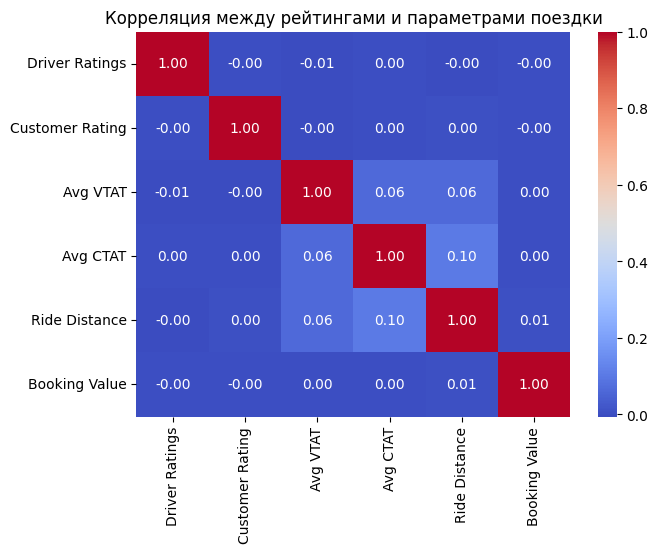

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['Driver Ratings','Customer Rating','Avg VTAT','Avg CTAT','Ride Distance','Booking Value']
corr = df[cols].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция между рейтингами и параметрами поездки")
plt.show()


In [81]:
df.groupby('Booking Status')[['Driver Ratings','Customer Rating']].mean()

,Driver Ratings,Customer Rating
Booking Status,,
Cancelled by Customer,NaN,NaN
Cancelled by Driver,NaN,NaN
Completed,4.230992,4.404584
Incomplete,NaN,NaN
No Driver Found,NaN,NaN


In [82]:
### here we can see that we should make normalize cuz corr work incorrect
min_size = df['Booking Status'].value_counts().min()

balanced_df_for_corr = df.groupby('Booking Status').apply(lambda x: x.sample(min_size, random_state=42)).reset_index(drop=True)

C:\Users\augoa\AppData\Local\Temp\ipykernel_27564\3536499650.py:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [83]:
from scipy.stats import f_oneway

groups = [g['Customer Rating'].dropna() for _, g in df.groupby('Booking Status')]
f_stat, p_val = f_oneway(*groups)

print("F-stat:", f_stat, "p-value:", p_val)


F-stat: nan p-value: nan


C:\Users\augoa\AppData\Local\Temp\ipykernel_27564\3615944073.py:4: SmallSampleWarning:

One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.



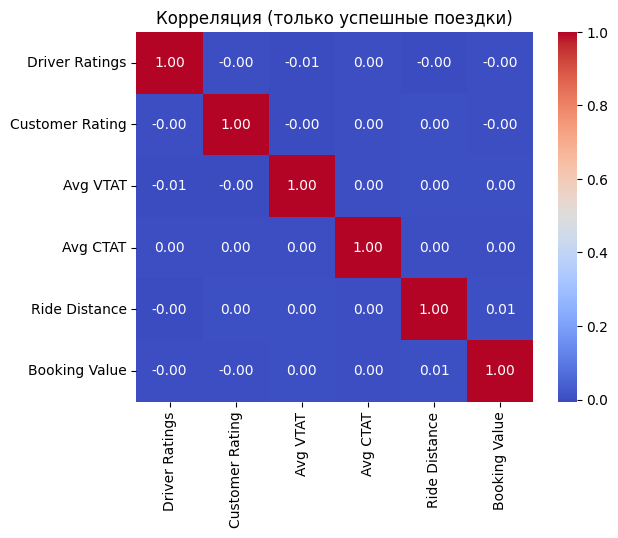

In [84]:
completed = df[df['Booking Status'] == 'Completed'].copy()

corr = completed[['Driver Ratings','Customer Rating','Avg VTAT','Avg CTAT','Ride Distance','Booking Value']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция (только успешные поездки)")
plt.show()


### we see the drivers rating in completed rides has relation only with avg VTAT 

In [85]:
non_completed = df[df['Booking Status'] != 'Completed'].copy()

# 2) Чистим пробелы в строковых полях (частая боль)
for c in ['Booking Status',
          'Driver Cancellation Reason',
          'Reason for cancelling by Customer',
          'Incomplete Rides Reason']:
    if c in non_completed.columns:
        non_completed[c] = non_completed[c].astype(str).str.strip().replace({'nan': np.nan})

# 3) Единая причина проблемы по статусу
non_completed['Problem Type'] = non_completed['Booking Status']

non_completed['Problem Reason'] = np.select(
    [
        non_completed['Booking Status'].eq('Cancelled by Driver'),
        non_completed['Booking Status'].eq('Cancelled by Customer'),
        non_completed['Booking Status'].eq('Incomplete'),
        non_completed['Booking Status'].eq('No Driver Found')
    ],
    [
        non_completed.get('Driver Cancellation Reason'),
        non_completed.get('Reason for cancelling by Customer'),
        non_completed.get('Incomplete Rides Reason'),
        'No Driver Found'  # у этого статуса отдельной «причины» нет
    ],
    default=np.nan
)

# 4) Подставляем "Unknown" если причина не указана
non_completed['Problem Reason'] = non_completed['Problem Reason'].fillna('Unknown')

# 5) Топ частых проблем + метрики по ним
agg = (
    non_completed
      .groupby(['Problem Type', 'Problem Reason'], dropna=False)  # dropna=False работает в pandas ≥ 1.1
      .agg(
          count=('Booking ID', 'count'),
          avg_vtat=('Avg VTAT', 'mean'),
          avg_ctat=('Avg CTAT', 'mean'),
          avg_distance=('Ride Distance', 'mean'),
          avg_value=('Booking Value', 'mean')
      )
      .reset_index()
      .sort_values('count', ascending=False)
)

# Если у тебя старая версия pandas без dropna=, то просто убери его — у нас и так NaN уже заменены на 'Unknown'

# 6) Покажем топ-20 проблем
top20 = agg.head(20)
print(top20)

             Problem Type                                Problem Reason  \
12        No Driver Found                               No Driver Found   
5     Cancelled by Driver                        Customer related issue   
8     Cancelled by Driver                The customer was coughing/sick   
7     Cancelled by Driver                 Personal & Car related issues   
6     Cancelled by Driver           More than permitted people in there   
9              Incomplete                               Customer Demand   
11             Incomplete                             Vehicle Breakdown   
10             Incomplete                                   Other Issue   
4   Cancelled by Customer                                 Wrong Address   
1   Cancelled by Customer                               Change of plans   
3   Cancelled by Customer  Driver is not moving towards pickup location   
2   Cancelled by Customer                        Driver asked to cancel   
0   Cancelled by Customer

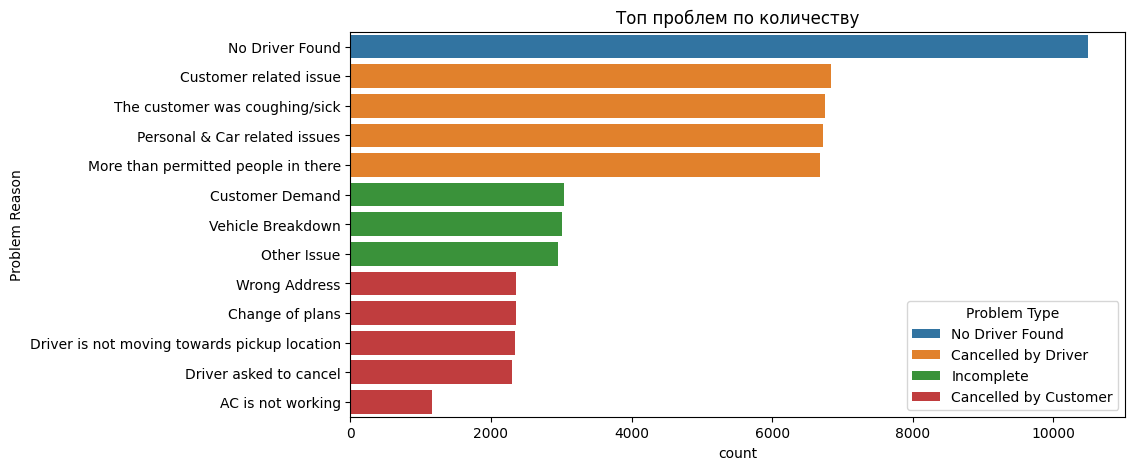

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(data=top20, x='count', y='Problem Reason', hue='Problem Type')
plt.title("Топ проблем по количеству")
plt.show()


### here the top problems which is the reason for decrasing the rating

In [87]:
non_completed[['Booking Status','Customer Rating','Driver Ratings']].notna().sum()


Booking Status     57000
Customer Rating        0
Driver Ratings         0
dtype: int64

In [88]:
### so i wanna predict the rating by machine learning 




y = df['Customer Rating'].notna().astype('double')
X = df[['Driver Ratings','Avg VTAT','Avg CTAT','Ride Distance','Booking Value']].copy()


from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
